In [36]:
import tensorflow as tf
import tensorflow.keras as keras
import Ipython.display as display

import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os 
import pathlib

In [53]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [23]:
os.getcwd()

'/home/ubuntu/Documents/handsON'

In [28]:
train_data_dir = os.path.join('/home/ubuntu/Documents/handsON', 'datasets/chest_xray/chest_xray/train')
val_data_dir = os.path.join('/home/ubuntu/Documents/handsON', 'datasets/chest_xray/chest_xray/val')
test_data_dir = os.path.join('/home/ubuntu/Documents/handsON', 'datasets/chest_xray/chest_xray/test')

In [29]:
train_data_dir

'/home/ubuntu/Documents/handsON/datasets/chest_xray/chest_xray/train'

In [30]:
train_data_dir = pathlib.Path(train_data_dir)
val_data_dir = pathlib.Path(val_data_dir)
test_data_dir = pathlib.Path(test_data_dir)

In [31]:
train_data_dir?

Type:        PosixPath
String form: /home/ubuntu/Documents/handsON/datasets/chest_xray/chest_xray/train
File:        ~/anaconda3/lib/python3.7/pathlib.py
Docstring:  
Path subclass for non-Windows systems.

On a POSIX system, instantiating a Path should return this object.


In [263]:
CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*') if item.name != '.DS_Store'])
CLASS_NAMES

array(['PNEUMONIA', 'NORMAL'], dtype='<U9')

In [35]:
normal = list(train_data_dir.glob('NORMAL/*'))
len(normal)

1342

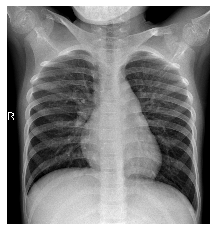

In [45]:
for image_path in normal[:1]:
    plt.gray()
    plt.axis('off')
    img = PIL.Image.open(str(image_path))
    plt.imshow(PIL.Image.open(str(image_path)))


In [51]:
img = np.array(img)
img.shape

(2206, 2056)

In [216]:
train_data = tf.data.Dataset.list_files(str(train_data_dir/'*/*'))
val_data = tf.data.Dataset.list_files(str(val_data_dir/'*/*'))
test_data = tf.data.Dataset.list_files(str(val_data_dir/'*/*'))

In [213]:
for f in train_data.take(1):
    img, label = process_path(f)
label

tf.Tensor([ True False], shape=(2,), dtype=bool)


<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [164]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == CLASS_NAMES

In [165]:
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])
    img = tf.squeeze(img)
    return img

In [211]:
depth = 2
def process_path(file_path):
    label = get_label(file_path)
#     label = tf.cast(label, tf.int32)
    print(label)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [212]:
# train_set = train_data.map(process_path, num_parallel_calls=AUTOTUNE)
# val_set = val_data.map(process_path, num_parallel_calls=AUTOTUNE)
# test_set = test_data.map(process_path, num_parallel_calls=AUTOTUNE)

Tensor("Equal:0", shape=(2,), dtype=bool)
Tensor("Equal:0", shape=(2,), dtype=bool)
Tensor("Equal:0", shape=(2,), dtype=bool)


In [218]:
train_set = train_data.map(process_path)
val_set = val_data.map(process_path)
test_set = test_data.map(process_path)

Tensor("Equal:0", shape=(2,), dtype=bool)
Tensor("Equal:0", shape=(2,), dtype=bool)
Tensor("Equal:0", shape=(2,), dtype=bool)


In [220]:
train_set

<MapDataset shapes: ((224, 224), (2,)), types: (tf.float32, tf.bool)>

In [197]:
for img, label in train_set.take(1):
#     print(label.numpy()*1)
    print(label)
# CLASS_NAMES[label.numpy()==1][0]

tf.Tensor([0 1], shape=(2,), dtype=int32)


In [198]:
tf.cast(label, tf.int32).numpy()


array([0, 1], dtype=int32)

In [181]:
tf.constant(2) * True

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [135]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,4))
    for n in range(10):
        ax = plt.subplot(2,5, n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n] == 1][0].title())
        plt.axis('off')

In [153]:
# def one_hot_encode(image, label):
#     return image, tf.one_hot(label, 2)

In [224]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

# train_batches = train_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# val_batches = val_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_batches = test_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [222]:
# for image_batch, label_batch in train_batches.take(1):
#     pass
# image_batch.shape, label_batch

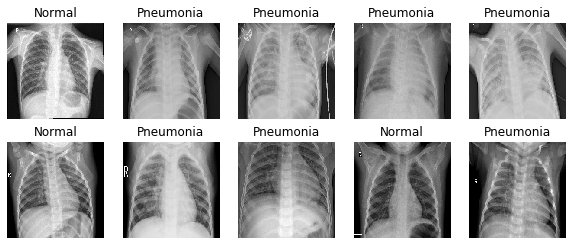

In [136]:
show_batch(image_batch, label_batch.numpy())

In [229]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [225]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_data_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_data_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


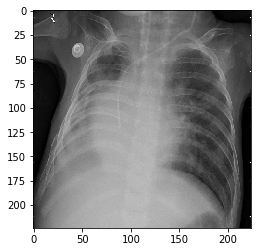

In [258]:
image, label = next(train_data_gen)
plt.imshow(image[0])

In [230]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=test_data_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 624 images belonging to 2 classes.


In [259]:
keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

In [260]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [261]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [264]:
epochs = 15

history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
   1531/Unknown - 2167s 1s/step - loss: 0.0466 - accuracy: 0.9819

KeyboardInterrupt: 